# Linear Autoencoder for PCA - EXERCISE 

** Follow the bold instructions below to reduce a 30 dimensional data set for classification into a 2-dimensional dataset! Then use the color classes to see if you still kept the same level of class separation in the dimensionality reduction**

## The Data

** Import numpy, matplotlib, and pandas**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

** Use pandas to read in the csv file called anonymized_data.csv . It contains 500 rows and 30 columns of anonymized data along with 1 last column with a classification label, where the columns have been renamed to 4 letter codes.**

In [8]:
data = pd.read_csv("./tensorflow_course_resources/05-Autoencoders/anonymized_data.csv")
x_data = data.drop(columns="Label", axis=1)

In [10]:
x_data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,WDRT,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,4.048589,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,4.341376,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,4.028944,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,3.974559,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,3.799633,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362


In [4]:
data.describe()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.237752,3.755108,-5.614445,-4.747200,6.447995,1.776850,1.718450,7.208016,2.556548,1.222064,...,0.295252,-9.053808,-6.291877,-2.345864,1.125596,0.284048,-2.817147,-2.192278,-2.816977,0.500000
std,4.121210,2.540833,3.853295,2.164355,2.796104,5.030617,5.771508,1.167246,2.146874,7.410762,...,1.017020,1.008391,1.305176,3.973564,8.839871,1.045746,4.548817,6.960762,3.758615,0.500501
min,-2.032145,-1.677119,-12.167510,-9.507402,1.220239,-5.435379,-6.699806,4.074939,-2.830792,-8.851496,...,-3.046497,-12.128499,-9.582822,-9.367262,-10.986387,-2.595682,-9.710075,-11.325978,-9.363069,0.000000
25%,0.287295,1.450981,-9.258086,-6.608699,3.816363,-3.246286,-3.921556,6.457160,0.742799,-5.980770,...,-0.346735,-9.698782,-7.330375,-6.232200,-7.569584,-0.466278,-7.291228,-9.077094,-6.421727,0.000000
50%,4.212893,4.122470,-4.681202,-4.521427,6.009192,1.465326,2.119661,7.148805,2.399665,1.082333,...,0.258733,-9.066828,-6.262909,-2.188896,1.200635,0.229365,-2.450744,-1.828291,-2.160272,0.500000
75%,8.238277,6.066863,-1.901586,-2.879066,9.145269,6.819129,7.323175,7.974873,4.526339,8.480955,...,1.028362,-8.344404,-5.314031,1.427888,9.875877,0.983905,1.569697,4.648586,0.744805,1.000000
max,11.221614,8.464551,0.806140,-0.109049,12.327433,9.730383,9.918112,10.449979,7.032117,11.569669,...,3.600537,-4.976943,-2.583479,4.686482,12.750833,3.770563,4.717894,7.294646,3.375074,1.000000


## Scale the Data

** Use scikit learn to scale the data with a MinMaxScaler. Remember not to scale the Label column, just the data. Save this scaled data as a new variable called scaled_data. **

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x_data)

# The Linear Autoencoder

** Import tensorflow and import fully_connected layers from tensorflow.contrib.layers. **

In [14]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
scaled_x.shape

(500, 30)

** Fill out the number of inputs to fit the dimensions of the data set and set the hidden number of units to be 2. Also set the number of outputs to match the number of inputs. Also choose a learning_rate value.**

In [15]:
num_inputs = scaled_x.shape[1]
num_hidden = 2
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate = 0.01

### Placeholder

** Create a placeholder fot the data called X.**

In [16]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Layers

** Create the hidden layer and the output layers using the fully_connected function. Remember that to perform PCA there is no activation function.**

In [17]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


### Loss Function

** Create a Mean Squared Error loss function. **

In [18]:
loss = tf.reduce_mean(tf.square(outputs - X))

### Optimizer

** Create an AdamOptimizer designed to minimize the previous loss function. **

In [20]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

### Init

** Create an instance of a global variable intializer. **

In [22]:
init = tf.global_variables_initializer()

## Running the Session

** Now create a Tensorflow session that runs the optimizer for at least 1000 steps. (You can also use epochs if you prefer, where 1 epoch is defined by one single run through the entire dataset. **

In [23]:
num_steps = 1000

with tf.Session() as session:
    session.run(init)
    
    for iteration in range(num_steps):
        session.run(train, feed_dict={X:scaled_x})
    
    output_2d = hidden.eval(feed_dict={X:scaled_x})

** Now create a session that runs the scaled data through the hidden layer. (You could have also done this in the last step after all the training steps. **

** Confirm that your output is now 2 dimensional along the previous axis of 30 features. **

In [24]:
output_2d.shape

(500, 2)

** Now plot out the reduced dimensional representation of the data. Do you still have clear separation of classes even with the reduction in dimensions? Hint: You definitely should, the classes should still be clearly seperable, even when reduced to 2 dimensions. **

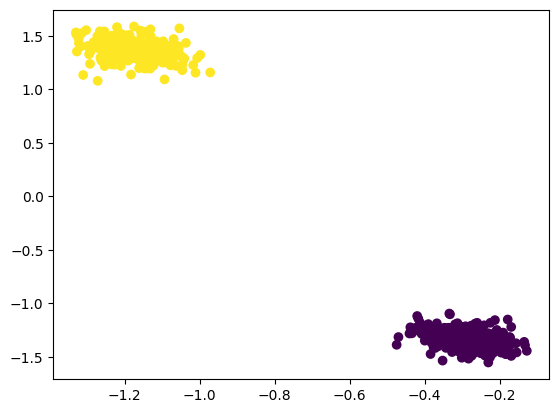

In [26]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=data["Label"])

# Great Job!